In [1]:
import numpy as np

import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt

import sys
import pickle
import os
import pdb
 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import seaborn as sns

# %pylab inline
# inline doesn't give interactive plots
%matplotlib inline 
# %matplotlib notebook
plt.rcParams['figure.figsize'] = (6.0, 6.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'Blues'

%load_ext autoreload
%autoreload 2

sns.set()

sys.path.append("../workstation/")

from utils.trajectory_utils import truncate_expert_data
from utils import data_utils
from utils.control_loop_data import ControlLoopData

In [2]:
def plot_2d_array(data, figsize=(6, 6), legend_label='', title='',
                  xlabel='', ylabel='', colors=[], marker='o',
                  linestyle='', linewidth=1.0, markersize=1):
    '''Plt a 2D numpy array.'''
    if len(colors) == 0:
        colors = sns.color_palette(n_colors=data.shape[1])
    
    if type(legend_label) is str and len(legend_label) == 0:
        legend_label = [str(i) for i in range(data.shape[1])]
    
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111, title=title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    lines = []
    for i in range(data.shape[1]):
        l = ax.plot(data[:, i], color=colors[i], label=legend_label[i],
                     marker=marker, linestyle='dashed',
                     linewidth=linewidth, markersize=markersize)
        lines.append(l[0])
    plt.legend(handles=lines)
    plt.show()

[(0, 3983), (3983, 7978), (7978, 11957), (11957, 13159), (13159, 14361), (14361, 15556), (15556, 16754), (16754, 17955), (17955, 19157), (19157, 20356), (20356, 21552), (21552, 22746), (22746, 25772), (25772, 26965), (26965, 28162), (28162, 29364), (29364, 30557), (30557, 31757), (31757, 32956), (32956, 34153), (34153, 35351), (35351, 36553), (36553, 38553), (38553, 40554), (40554, 41448), (41448, 42641), (42641, 43838), (43838, 45039), (45039, 46241), (46241, 47443), (47443, 48644), (48644, 49846), (49846, 51048), (51048, 52249), (52249, 72497), (72497, 76470), (76470, 80460), (80460, 82458), (82458, 84438), (84438, 85310), (85310, 86503), (86503, 87692), (87692, 88880), (88880, 90079), (90079, 91276), (91276, 92464), (92464, 93650), (93650, 94839), (94839, 96026), (96026, 116331), (116331, 120305), (120305, 124293), (124293, 126274), (126274, 128261), (128261, 129164), (129164, 130356), (130356, 131555), (131555, 132749), (132749, 133951), (133951, 135147), (135147, 136338), (136338,

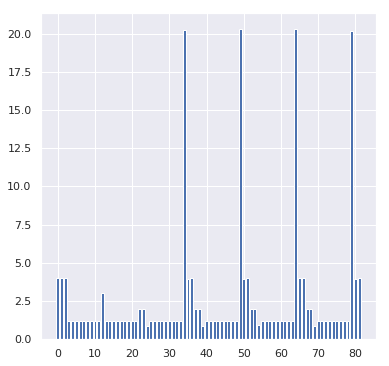

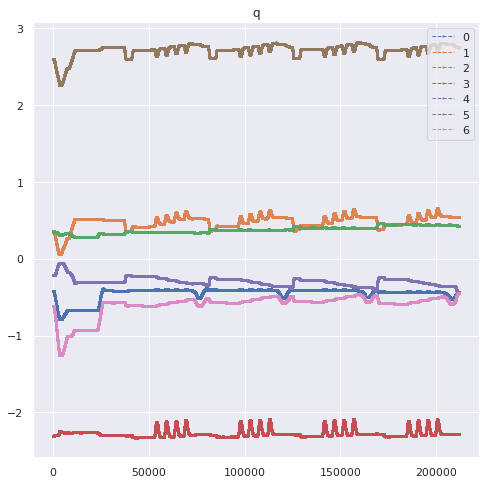

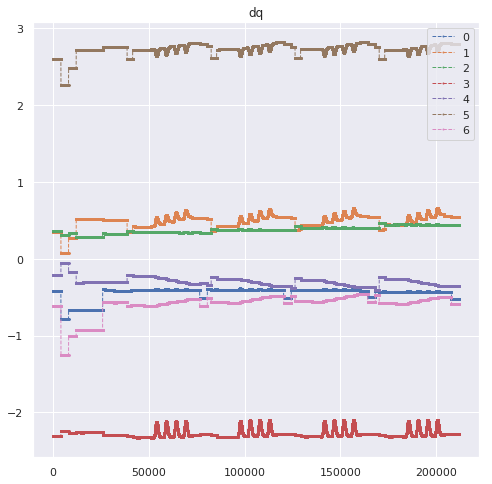

dict

In [5]:
control_loop_data_path = '/media/hdd/mohit/mohit_data_exploration_4/control_loop_data.txt'
csv_data = data_utils.read_data_as_csv(control_loop_data_path)

control_loop_data = ControlLoopData(csv_data) 
print(control_loop_data.skill_time_as_tuple_list)

skill_times = control_loop_data.get_duration_for_each_skill()
skill_times_in_seconds = [t/1000.0 for t in skill_times] 
for i, t in enumerate(skill_times_in_seconds):
    print("Skill: {}, time: {:.3f}".format(i, t))
    
matplotlib.pyplot.bar(range(len(skill_times_in_seconds)), skill_times_in_seconds)
plt.show()

# plt.plot(control_loop_data.data_as_ord_dict['q'][:, :])
# plt.show()
plot_2d_array(control_loop_data.data_as_ord_dict['q'], title='q',
              legend_label=['0', '1', '2', '3', '4', '5', '6'],
              figsize=(8, 8))
plot_2d_array(control_loop_data.data_as_ord_dict['dq'], figsize=(8, 8), title='dq')

type(csv_data)
